# 1.实现透镜变换

In [1]:
import cv2
import numpy as np

img = cv2.imread('gray_test.jpg')

result1 = img.copy()

'''
注意这里src和dst的输入并不是图像，而是图像对应的顶点坐标。
'''
src = np.float32([[207, 151], [517, 285], [17, 601], [343, 731]])# 原始图像4个顶点
dst = np.float32([[0, 0], [337, 0], [0, 488], [337, 488]]) # 原始图片映射之后的4个顶点
print(img.shape)
# 生成透视变换矩阵；进行透视变换
m = cv2.getPerspectiveTransform(src, dst) # 变换矩阵，即获得映射之后的图片时用的参数矩阵
print("warpMatrix:")
print(m)
result = cv2.warpPerspective(result1, m, (337, 488))
cv2.imshow("src", img)
cv2.imshow("result", result)
cv2.waitKey(0)

(1200, 1920, 3)
warpMatrix:
[[ 8.92263779e-01  3.76733596e-01 -2.41585375e+02]
 [-4.08140258e-01  9.44205073e-01 -5.80899328e+01]
 [-8.53836442e-05  5.16464182e-05  1.00000000e+00]]


-1

# 2.实现kmeans

(1200, 1920)
二维像素转为一维像素之后的结果:
[[93.]
 [93.]
 [93.]
 ...
 [90.]
 [90.]
 [90.]]


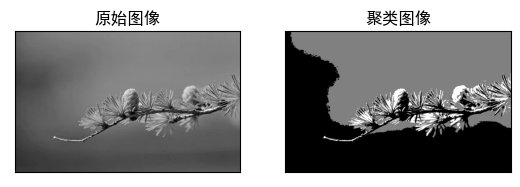

In [5]:
# coding: utf-8

import cv2
import numpy as np
import matplotlib.pyplot as plt

#读取原始图像灰度颜色
img = cv2.imread('gray_test.jpg', 0) 
print (img.shape)

#获取图像高度、宽度
rows, cols = img.shape[:]

#图像二维像素转换为一维
data = img.reshape((rows * cols, 1))
data = np.float32(data)
print('二维像素转为一维像素之后的结果:')
print(data)

#停止条件 (type,max_iter,epsilon)
criteria = (cv2.TERM_CRITERIA_EPS +cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#设置标签
flags = cv2.KMEANS_RANDOM_CENTERS

#K-Means聚类 聚集成3类
compactness, labels, centers = cv2.kmeans(data, 3, None, criteria, 10, flags)

#生成最终图像
dst = labels.reshape((img.shape[0], img.shape[1]))

#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']

#显示图像
titles = [u'原始图像', u'聚类图像']  
images = [img, dst]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray'), 
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()